In [5]:
import math
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline
from collections import Counter

In [36]:

train_path="train/"
list = os.listdir("train")
label_counts = Counter()
for label in list:
    label_counts[label]=len(os.listdir(train_path+label))
print(label_counts)
label_df=pd.DataFrame.from_dict(label_counts, orient='index')
label_df = label_df.rename(columns={'index':'label', 0:'count'})
print(label_df)




Counter({'brown gram': 156, 'green gram': 143, 'split bengal gram': 137, 'green peas': 119, 'black eyed peas': 115})
                   count
brown gram           156
black eyed peas      115
green gram           143
green peas           119
split bengal gram    137


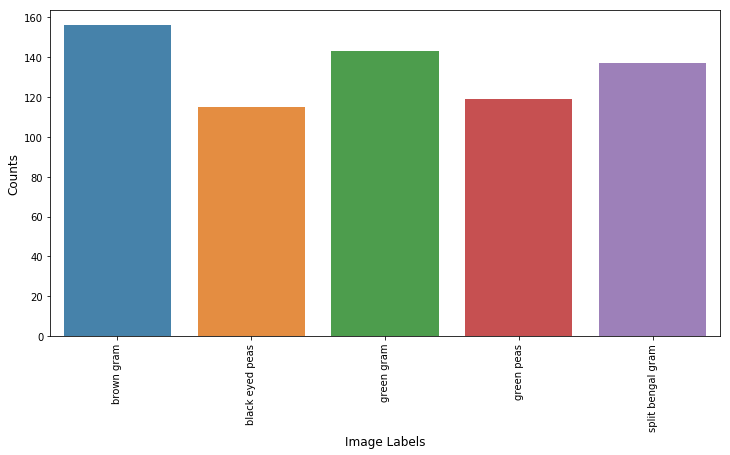

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(label_df.index, label_df.values.flatten(), alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [37]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

class_size=600

src_train_dir=os.path.join('train/')
dest_train_dir=os.path.join('train2/')
it=0
for count in label_df.values.flatten():
    #nb of generations per image for this class label in order to make it size ~= class_size
    ratio=math.floor(class_size/count)-1
    print(count,count*(ratio+1))
    dest_lab_dir=os.path.join(dest_train_dir,label_df.index[it])
   
    src_lab_dir=os.path.join(src_train_dir,label_df.index[it])
    if not os.path.exists(dest_lab_dir):
        os.makedirs(dest_lab_dir)
    for file in os.listdir(src_lab_dir):
        img=load_img(os.path.join(src_lab_dir,file))
        #img.save(os.path.join(dest_lab_dir,file))
        x=img_to_array(img) 
        x=x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1,save_to_dir=dest_lab_dir, save_format='jpg'):
            i+=1
          
            if i > ratio:
                break 
    it=it+1

156 468
115 575
143 572
119 595
137 548


In [38]:
for dirpath, dirnames, filenames in os.walk(dest_train_dir):
    i=0
    label=''
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        label=os.path.split(dirpath)[1]
        i+=1
    print(label,i)

 0
black eyed peas 562
brown gram 459
green gram 562
green peas 575
split bengal gram 536
